In [1]:
import nfl_data_py as nfl
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import urllib.request
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from adjustText import adjust_text

In [2]:
team_color = {'ARI':'#97233F','ATL':'#A71930','BAL':'#241773','BUF':'#00338D','CAR':'#0085CA','CHI':'#00143F',
          'CIN':'#FB4F14','CLE':'#FB4F14','DAL':'#B0B7BC','DEN':'#002244','DET':'#046EB4','GB':'#24423C',
          'HOU':'#C9243F','IND':'#003D79','JAX':'#136677','KC':'#CA2430','LAR':'#002147','LAC':'#2072BA',
          'MIA':'#0091A0','MIN':'#4F2E84','NE':'#0A2342','NO':'#A08A58','NYG':'#192E6C','NYJ':'#203731',
          'LV':'#C4C9CC','PHI':'#014A53','PIT':'#FFC20E','SEA':'#7AC142','SF':'#C9243F','TB':'#D40909',
          'TEN':'#4095D1','WAS':'#FFC20F'}

In [3]:
import_data = nfl.import_seasonal_data([2022])             
rb_season_data = pd.DataFrame(index = import_data.index)
rb_season_data["Player ID"] = import_data["player_id"]
rb_season_data["Carries"] = import_data["carries"]
rb_season_data["Rushing Yards"] = import_data["rushing_yards"]
rb_season_data["Rushing TDs"] = import_data["rushing_tds"]
rb_season_data["Fumbles"] = import_data["rushing_fumbles"]
rb_season_data["Fumbles Lost"] = import_data["rushing_fumbles_lost"]
rb_season_data["Rushing 1st Downs"] = import_data["rushing_first_downs"]
rb_season_data["Rushing EPA"] = import_data["rushing_epa"]
rb_season_data["Rushing 2Pt Conversions"] = import_data["rushing_2pt_conversions"]
rb_season_data["Games Played"] = import_data["games"]
rb_season_data

,Player ID,Carries,Rushing Yards,Rushing TDs,Fumbles,Fumbles Lost,Rushing 1st Downs,Rushing EPA,Rushing 2Pt Conversions,Games Played
0,00-0019596,5,-3.0,0,1.0,1.0,0.0,-8.552574,0,2
1,00-0023459,6,9.0,0,1.0,1.0,1.0,-7.825522,0,2
2,00-0026143,4,12.0,0,2.0,1.0,2.0,-4.417951,0,2
3,00-0026158,3,6.0,0,0.0,0.0,1.0,-0.136921,0,2
4,00-0026498,1,2.0,0,0.0,0.0,1.0,0.158808,0,2
...,...,...,...,...,...,...,...,...,...,...
368,00-0038120,13,73.0,0,0.0,0.0,2.0,0.994354,0,2
369,00-0038124,1,7.0,0,0.0,0.0,0.0,0.470464,0,2
370,00-0038128,4,16.0,0,1.0,1.0,1.0,-5.589098,0,1
371,00-0038129,0,0.0,0,0.0,0.0,0.0,0.000000,0,1


In [4]:
import_weekly_data = nfl.import_weekly_data([2022])             
rb_data = pd.DataFrame(index = import_weekly_data.index)
rb_data["Player"] = import_weekly_data["player_name"]
rb_data["Player ID"] = import_weekly_data["player_id"]
rb_data["Team"] = import_weekly_data["recent_team"]
rb_data["Player Full Name"] = import_weekly_data["player_display_name"]
rb_data = rb_data.drop_duplicates(subset=['Player Full Name'])
rb_data.loc[rb_data["Team"] == "LA", "Team"] = "LAR"

Downcasting floats.


In [5]:
rb_merged_season_data = rb_data.merge(rb_season_data, left_on='Player ID', right_on='Player ID')
#rb_merged_season_data = rb_merged_season_data.loc[rb_merged_season_data["Attempts"] > 20, :]
rb_merged_season_data = rb_merged_season_data.drop(columns=["Player ID"])
rb_merged_season_data.sort_values(by=['Team'])

,Player,Team,Player Full Name,Carries,Rushing Yards,Rushing TDs,Fumbles,Fumbles Lost,Rushing 1st Downs,Rushing EPA,Rushing 2Pt Conversions,Games Played
104,J.Conner,ARI,James Conner,17,51.0,1,1.0,0.0,4.0,-1.024686,0,2
206,G.Dortch,ARI,Greg Dortch,0,0.0,0,0.0,0.0,0.0,0.000000,0,2
195,K.Murray,ARI,Kyler Murray,10,57.0,1,0.0,0.0,5.0,7.300781,1,2
190,T.McSorley,ARI,Trace McSorley,3,20.0,0,0.0,0.0,1.0,0.745036,0,1
222,M.Brown,ARI,Marquise Brown,0,0.0,0,0.0,0.0,0.0,0.000000,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
69,J.McKissic,WAS,J.D. McKissic,6,17.0,0,0.0,0.0,2.0,-1.135837,0,2
298,J.Bates,WAS,John Bates,0,0.0,0,0.0,0.0,0.0,0.000000,0,2
77,C.Wentz,WAS,Carson Wentz,8,35.0,0,0.0,0.0,2.0,3.085310,0,2
355,J.Dotson,WAS,Jahan Dotson,1,-10.0,0,0.0,0.0,0.0,-1.455014,0,2


In [6]:
rb_data_ngs = pd.read_csv("../Resources/ngs_2022_rushing.csv")
rb_data_ngs = rb_data_ngs.loc[rb_data_ngs["week"] == 0, :]
rb_data_ngs = rb_data_ngs.sort_values(by=['team_abbr'])
rb_data_ngs = rb_data_ngs.drop_duplicates(subset=['player_display_name'])
rb_data_full = rb_data_ngs.merge(rb_merged_season_data, left_on='player_display_name', right_on='Player Full Name')
rb_data_full = rb_data_full.drop(columns = ["season", "season_type", "player_first_name", "player_last_name",
                                            "player_jersey_number", "Player Full Name", "Team", "Carries",
                                           "Rushing Yards", "Rushing TDs", "week"])
rb_data_full.columns

Index(['player_display_name', 'player_position', 'team_abbr', 'efficiency',
       'percent_attempts_gte_eight_defenders', 'avg_time_to_los',
       'rush_attempts', 'rush_yards', 'expected_rush_yards',
       'rush_yards_over_expected', 'avg_rush_yards',
       'rush_yards_over_expected_per_att', 'rush_pct_over_expected',
       'rush_touchdowns', 'player_gsis_id', 'player_short_name', 'Player',
       'Fumbles', 'Fumbles Lost', 'Rushing 1st Downs', 'Rushing EPA',
       'Rushing 2Pt Conversions', 'Games Played'],
      dtype='object')

In [7]:
rb_data_full

,player_display_name,player_position,team_abbr,efficiency,percent_attempts_gte_eight_defenders,avg_time_to_los,rush_attempts,rush_yards,expected_rush_yards,rush_yards_over_expected,...,rush_touchdowns,player_gsis_id,player_short_name,Player,Fumbles,Fumbles Lost,Rushing 1st Downs,Rushing EPA,Rushing 2Pt Conversions,Games Played
0,James Conner,RB,ARI,4.944902,5.882353,2.551438,17,51,67.160725,-16.160725,...,1,00-0033553,J.Conner,J.Conner,1.0,0.0,4.0,-1.024686,0,2
1,Eno Benjamin,RB,ARI,3.382712,8.333333,2.978333,12,59,43.970327,15.029673,...,0,00-0036383,E.Benjamin,E.Benjamin,0.0,0.0,3.0,1.161296,0,2
2,Cordarrelle Patterson,RB,ATL,3.414845,12.500000,2.725968,32,161,154.984889,6.015111,...,1,00-0030578,C.Patterson,C.Patterson,0.0,0.0,12.0,-0.054741,0,2
3,Tyler Allgeier,RB,ATL,4.193667,0.000000,2.775400,10,30,34.485343,-4.485343,...,0,00-0037263,T.Allgeier,T.Allgeier,0.0,0.0,1.0,-2.993761,0,1
4,Kenyan Drake,RB,BAL,6.481026,52.941176,3.146000,17,39,62.841361,-23.841361,...,0,00-0033118,K.Drake,K.Drake,0.0,0.0,1.0,-6.726349,0,2
5,Devin Singletary,RB,BUF,3.259851,7.142857,2.903538,14,67,60.092218,6.907782,...,0,00-0035250,D.Singletary,D.Singletary,0.0,0.0,3.0,-0.449015,0,2
6,James Cook,RB,BUF,4.122727,0.000000,2.982750,12,55,69.045328,-14.045328,...,0,00-0037248,J.Cook,J.Cook,1.0,1.0,3.0,-4.016421,0,2
7,Christian McCaffrey,RB,CAR,3.107630,20.000000,2.550500,25,135,118.120841,13.879159,...,1,00-0033280,C.McCaffrey,C.McCaffrey,0.0,0.0,8.0,8.411479,0,2
8,Khalil Herbert,RB,CHI,2.390602,23.076923,2.569846,13,83,65.596762,12.403238,...,1,00-0036906,K.Herbert,K.Herbert,0.0,0.0,4.0,5.743468,0,2
9,David Montgomery,RB,CHI,3.732838,25.000000,2.911448,32,148,118.356778,29.643222,...,0,00-0035685,D.Montgomery,D.Montgomery,0.0,0.0,6.0,-3.632915,0,2


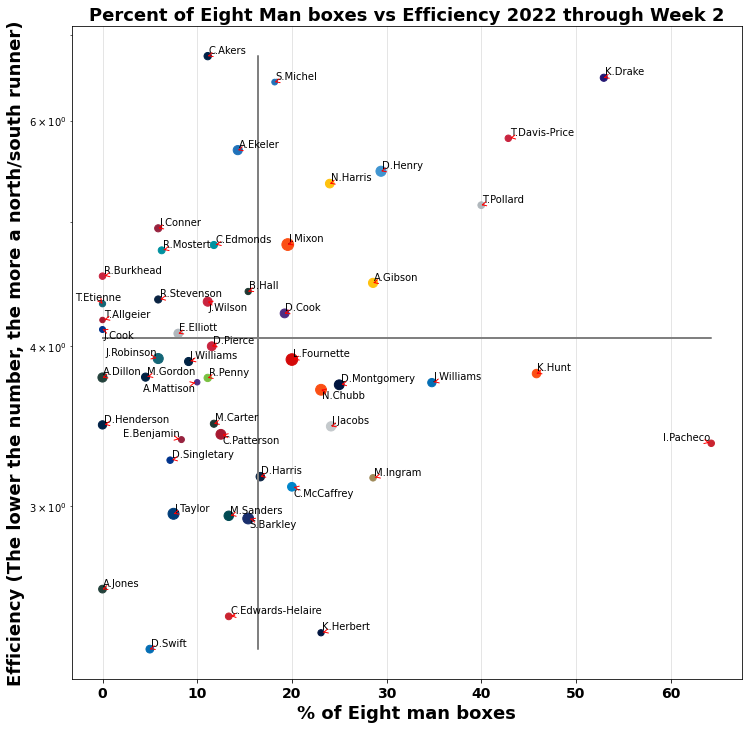

In [8]:
rb_graph = rb_data_full[["player_short_name", "percent_attempts_gte_eight_defenders", "efficiency", "team_abbr",
                         "rush_attempts"]]

x = rb_graph["percent_attempts_gte_eight_defenders"]
y = rb_graph["efficiency"]
color = []
x_mean = [np.mean(x)]*len(x)
y_mean = [np.mean(y)]*len(y)

for team in rb_graph["team_abbr"]:
    color.append(team_color[team])

size = rb_graph["rush_attempts"].to_numpy()
s = [s*3 for s in size]

#Create a figure with size 12x12
fig, ax = plt.subplots(figsize=(12,12))

#Make a scatter plot with success rate data
plt.scatter(x, y, c = color, s = s)

mean_line = ax.plot(x_mean,y, c = 'grey')
mean_line = ax.plot(x,y_mean, c = 'grey')
    
#Add a grid
ax.grid(zorder=0,alpha=.4)
ax.set_axisbelow(True)

#Adding labels and text
plt.xlabel('% of Eight man boxes', fontsize=18, fontweight = "bold")
plt.ylabel('Efficiency (The lower the number, the more a north/south runner)', fontsize=18, fontweight = "bold")
plt.yscale('log')
plt.title('Percent of Eight Man boxes vs Efficiency 2022 through Week 2', fontsize=18, fontweight = "bold")
plt.xticks(fontsize=14, fontweight = "bold")
plt.yticks(fontsize=14, fontweight = "bold")

#Add player names to points
texts = [plt.text(x[i], y[i], txt, ha='center', va='center') for i, txt in enumerate(rb_graph["player_short_name"])]    
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))

#plt.savefig('Images/AvgAirYards1stDown_vs_Passing1stDown', dpi=400)
plt.show()

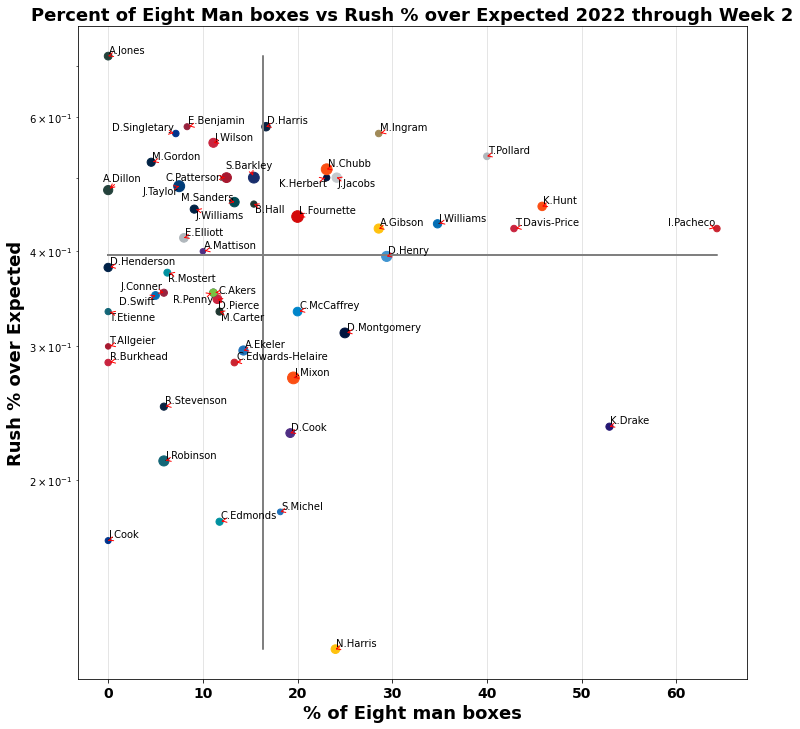

In [9]:
rb_graph = rb_data_full[["player_short_name", "percent_attempts_gte_eight_defenders", "rush_pct_over_expected",
                         "team_abbr", "rush_attempts"]]

x = rb_graph["percent_attempts_gte_eight_defenders"]
y = rb_graph["rush_pct_over_expected"]
color = []
x_mean = [np.mean(x)]*len(x)
y_mean = [np.mean(y)]*len(y)

for team in rb_graph["team_abbr"]:
    color.append(team_color[team])

size = rb_graph["rush_attempts"].to_numpy()
s = [s*3 for s in size]

#Create a figure with size 12x12
fig, ax = plt.subplots(figsize=(12,12))

#Make a scatter plot with success rate data
plt.scatter(x, y, c = color, s = s)

mean_line = ax.plot(x_mean,y, c = 'grey')
mean_line = ax.plot(x,y_mean, c = 'grey')
    
#Add a grid
ax.grid(zorder=0,alpha=.4)
ax.set_axisbelow(True)

#Adding labels and text
plt.xlabel('% of Eight man boxes', fontsize=18, fontweight = "bold")
plt.ylabel('Rush % over Expected', fontsize=18, fontweight = "bold")
plt.yscale('log')
plt.title('Percent of Eight Man boxes vs Rush % over Expected 2022 through Week 2', fontsize=18, fontweight = "bold")
plt.xticks(fontsize=14, fontweight = "bold")
plt.yticks(fontsize=14, fontweight = "bold")

#Add player names to points
texts = [plt.text(x[i], y[i], txt, ha='center', va='center') for i, txt in enumerate(rb_graph["player_short_name"])]    
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))

#plt.savefig('Images/AvgAirYards1stDown_vs_Passing1stDown', dpi=400)
plt.show()

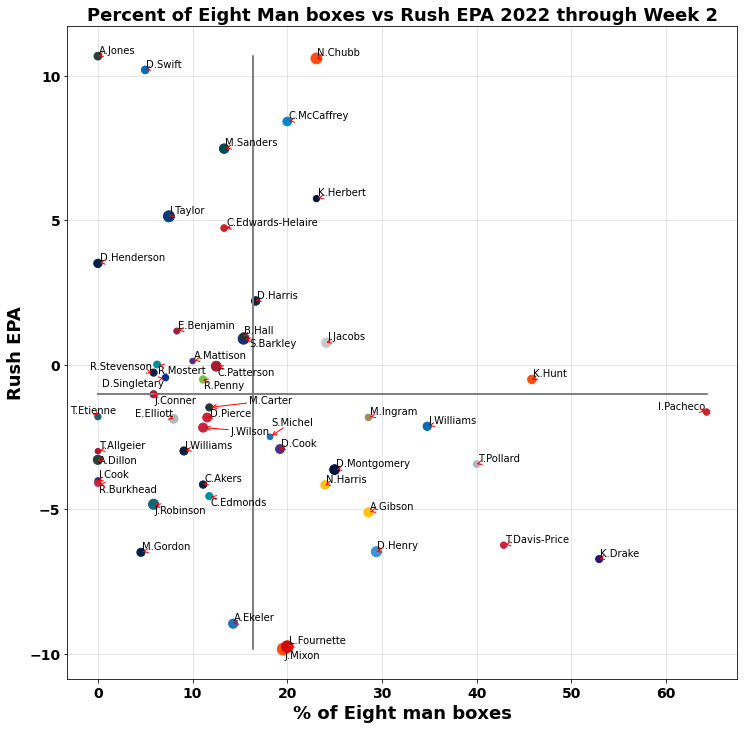

In [10]:
rb_graph = rb_data_full[["player_short_name", "percent_attempts_gte_eight_defenders", "Rushing EPA",
                         "team_abbr", "rush_attempts"]]

x = rb_graph["percent_attempts_gte_eight_defenders"]
y = rb_graph["Rushing EPA"]
color = []
x_mean = [np.mean(x)]*len(x)
y_mean = [np.mean(y)]*len(y)

for team in rb_graph["team_abbr"]:
    color.append(team_color[team])

size = rb_graph["rush_attempts"].to_numpy()
s = [s*3 for s in size]

#Create a figure with size 12x12
fig, ax = plt.subplots(figsize=(12,12))

#Make a scatter plot with success rate data
plt.scatter(x, y, c = color, s = s)

mean_line = ax.plot(x_mean,y, c = 'grey')
mean_line = ax.plot(x,y_mean, c = 'grey')
    
#Add a grid
ax.grid(zorder=0,alpha=.4)
ax.set_axisbelow(True)

#Adding labels and text
plt.xlabel('% of Eight man boxes', fontsize=18, fontweight = "bold")
plt.ylabel('Rush EPA', fontsize=18, fontweight = "bold")
#plt.yscale('log')
plt.title('Percent of Eight Man boxes vs Rush EPA 2022 through Week 2', fontsize=18, fontweight = "bold")
plt.xticks(fontsize=14, fontweight = "bold")
plt.yticks(fontsize=14, fontweight = "bold")

#Add player names to points
texts = [plt.text(x[i], y[i], txt, ha='center', va='center') for i, txt in enumerate(rb_graph["player_short_name"])]    
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))

plt.savefig('Images/Per8Man_vs_RushEPA', dpi=400)
plt.show()

In [11]:
rb_data_pfr = pd.read_csv("../Resources/advstats_season_rush.csv")
rb_data_pfr = rb_data_pfr.loc[rb_data_pfr["season"] == 2022, :]
rb_data_pfr = rb_data_pfr.drop(columns=["season", "tm", "pfr_id", "age", "pos", "gs", "att", "yds",
                                       "x1d", "loaded"])
rb_data_all = rb_data_full.merge(rb_data_pfr, left_on='player_display_name', right_on='player')
rb_data_all.columns

Index(['player_display_name', 'player_position', 'team_abbr', 'efficiency',
       'percent_attempts_gte_eight_defenders', 'avg_time_to_los',
       'rush_attempts', 'rush_yards', 'expected_rush_yards',
       'rush_yards_over_expected', 'avg_rush_yards',
       'rush_yards_over_expected_per_att', 'rush_pct_over_expected',
       'rush_touchdowns', 'player_gsis_id', 'player_short_name', 'Player',
       'Fumbles', 'Fumbles Lost', 'Rushing 1st Downs', 'Rushing EPA',
       'Rushing 2Pt Conversions', 'Games Played', 'player', 'g', 'ybc',
       'ybc_att', 'yac', 'yac_att', 'brk_tkl', 'att_br'],
      dtype='object')

In [12]:
rb_data_all

,player_display_name,player_position,team_abbr,efficiency,percent_attempts_gte_eight_defenders,avg_time_to_los,rush_attempts,rush_yards,expected_rush_yards,rush_yards_over_expected,...,Rushing 2Pt Conversions,Games Played,player,g,ybc,ybc_att,yac,yac_att,brk_tkl,att_br
0,James Conner,RB,ARI,4.944902,5.882353,2.551438,17,51,67.160725,-16.160725,...,0,2,James Conner,2,21,1.2,30,1.8,0,NaN
1,Eno Benjamin,RB,ARI,3.382712,8.333333,2.978333,12,59,43.970327,15.029673,...,0,2,Eno Benjamin,2,29,2.4,30,2.5,2,6.0
2,Cordarrelle Patterson,RB,ATL,3.414845,12.500000,2.725968,32,161,154.984889,6.015111,...,0,2,Cordarrelle Patterson,2,84,2.6,77,2.4,0,NaN
3,Tyler Allgeier,RB,ATL,4.193667,0.000000,2.775400,10,30,34.485343,-4.485343,...,0,1,Tyler Allgeier,1,14,1.4,16,1.6,0,NaN
4,Kenyan Drake,RB,BAL,6.481026,52.941176,3.146000,17,39,62.841361,-23.841361,...,0,2,Kenyan Drake,2,29,1.7,10,0.6,0,NaN
5,Devin Singletary,RB,BUF,3.259851,7.142857,2.903538,14,67,60.092218,6.907782,...,0,2,Devin Singletary,2,52,3.7,15,1.1,0,NaN
6,James Cook,RB,BUF,4.122727,0.000000,2.982750,12,55,69.045328,-14.045328,...,0,2,James Cook,2,55,4.6,0,0.0,0,NaN
7,Christian McCaffrey,RB,CAR,3.107630,20.000000,2.550500,25,135,118.120841,13.879159,...,0,2,Christian McCaffrey,2,66,2.6,69,2.8,1,25.0
8,Khalil Herbert,RB,CHI,2.390602,23.076923,2.569846,13,83,65.596762,12.403238,...,0,2,Khalil Herbert,2,65,5.0,18,1.4,1,13.0
9,David Montgomery,RB,CHI,3.732838,25.000000,2.911448,32,148,118.356778,29.643222,...,0,2,David Montgomery,2,53,1.7,95,3.0,8,4.0


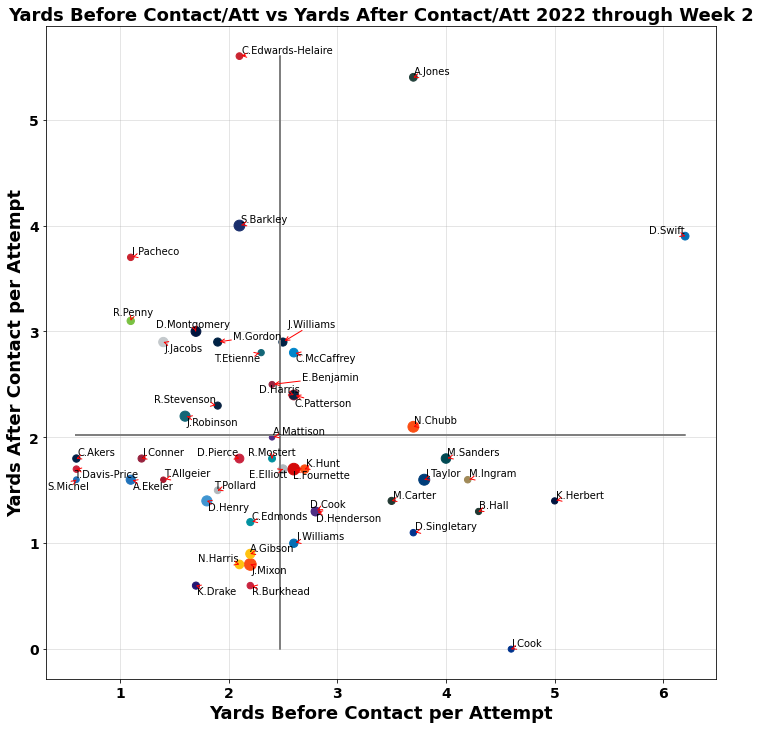

In [14]:
rb_graph = rb_data_all[["player_short_name", "ybc_att", "yac_att", "team_abbr", "rush_attempts"]]

x = rb_graph["ybc_att"]
y = rb_graph["yac_att"]
color = []
x_mean = [np.mean(x)]*len(x)
y_mean = [np.mean(y)]*len(y)

for team in rb_graph["team_abbr"]:
    color.append(team_color[team])

size = rb_graph["rush_attempts"].to_numpy()
s = [s*3 for s in size]

#Create a figure with size 12x12
fig, ax = plt.subplots(figsize=(12,12))

#Make a scatter plot with success rate data
plt.scatter(x, y, c = color, s = s)

mean_line = ax.plot(x_mean,y, c = 'grey')
mean_line = ax.plot(x,y_mean, c = 'grey')
    
#Add a grid
ax.grid(zorder=0,alpha=.4)
ax.set_axisbelow(True)

#Adding labels and text
plt.xlabel('Yards Before Contact per Attempt', fontsize=18, fontweight = "bold")
plt.ylabel('Yards After Contact per Attempt', fontsize=18, fontweight = "bold")
#plt.yscale('log')
plt.title('Yards Before Contact/Att vs Yards After Contact/Att 2022 through Week 2', fontsize=18, fontweight = "bold")
plt.xticks(fontsize=14, fontweight = "bold")
plt.yticks(fontsize=14, fontweight = "bold")

#Add player names to points
texts = [plt.text(x[i], y[i], txt, ha='center', va='center') for i, txt in enumerate(rb_graph["player_short_name"])]    
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))

plt.savefig('Images/AvgYBC_vs_AvgYAC', dpi=400)
plt.show()